In [1]:
!pip install sklearn
!pip install scikit-learn
!pip install numpy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=779fdb1bb6a827d833f4be44b3dc01abff397d6310fa84cc89f8c83bf350cd5b
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
data = fetch_california_housing(as_frame=True)
data = data['frame'] # 8 features + 1 target value

In [15]:
'''
Simple EDA

1. 결측치 확인
2. dtype이 object인 column 확인 --> categorical feature가 될만한 대상을 확인
3. target value의 분포 (여러가지 특징) 확인

'''

data.info()
data.MedHouseVal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

<Axes: xlabel='MedHouseVal', ylabel='Count'>

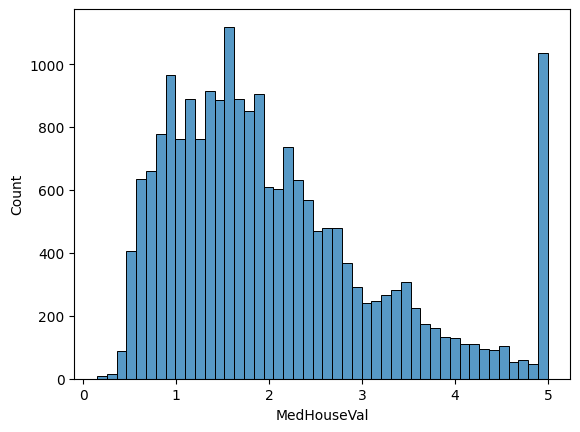

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data, x='MedHouseVal') # clipping (5.0 이상의 값들 --> 5.0)

<Axes: ylabel='MedHouseVal'>

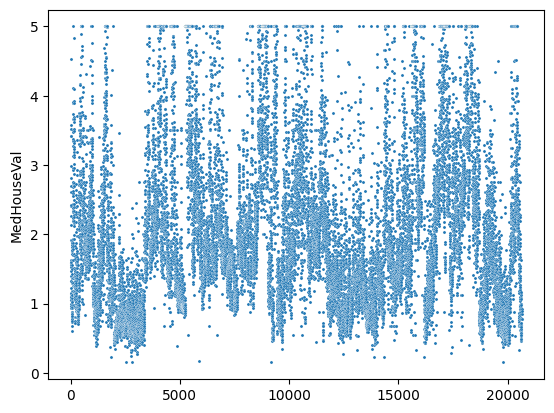

In [18]:
sns.scatterplot(x=data.index, y=data.MedHouseVal, s=5)

In [27]:
# data split

from sklearn.model_selection import train_test_split

X = data.drop(columns="MedHouseVal") # feature vector
y = data.MedHouseVal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train, X_test, y_train, y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train : val = 3 : 1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)
(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [28]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,2.3681,39.0,3.922460,1.018717,1404.0,3.754011,34.43,-119.67
8817,10.1357,24.0,7.564516,0.985112,2248.0,2.789082,33.74,-118.32
19686,1.6719,41.0,3.908012,0.916914,856.0,2.540059,39.13,-121.62
3545,4.8333,9.0,5.201093,1.009836,1884.0,2.059016,34.24,-118.63
17019,5.5902,38.0,7.010127,0.979747,994.0,2.516456,37.52,-122.30
...,...,...,...,...,...,...,...,...
5606,3.3427,16.0,3.748996,1.146586,951.0,1.909639,33.79,-118.29
16339,3.6083,16.0,5.720486,0.980903,2279.0,3.956597,38.04,-121.34
14965,3.9844,18.0,5.549834,1.014950,1952.0,3.242525,32.74,-116.99
11117,4.5112,16.0,4.414286,1.011429,730.0,2.085714,33.84,-117.87


In [29]:
# fitting
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

reg2 = RandomForestRegressor()
reg3 = XGBRegressor()
reg4 = LGBMRegressor()

reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)

LGBMRegressor()

In [45]:
# evaluation
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train)
pred2 = reg.predict(X_val)
pred3 = reg.predict(X_test)

print("--- LR Train ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_train, pred), r2_score(y_train, pred)))
print("--- LR Validation ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_val, pred2), r2_score(y_val, pred2)))
print("--- LR Test ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_test, pred3), r2_score(y_test, pred3)))

--- LR Train ---
MSE, R2 : 0.5144, 0.6117
--- LR Validation ---
MSE, R2 : 0.5297, 0.6142
--- LR Test ---
MSE, R2 : 0.5618, 0.5713


In [41]:
reg.coef_

array([ 4.55603516e-01,  9.51867573e-03, -1.34972463e-01,  8.62278742e-01,
       -8.39178933e-06, -3.69767511e-03, -4.16827258e-01, -4.29879849e-01])

In [39]:
pred = reg2.predict(X_train)
pred2 = reg2.predict(X_val)
pred3 = reg2.predict(X_test)

print("--- RF Train ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_train, pred), r2_score(y_train, pred)))
print("--- RF Validation ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_val, pred2), r2_score(y_val, pred2)))
print("--- RF Test ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_test, pred3), r2_score(y_test, pred3)))

--- RF Train ---
MSE, R2 : 0.0363, 0.9726
--- RF Validation ---
MSE, R2 : 0.2624, 0.8089
--- RF Test ---
MSE, R2 : 0.2599, 0.8017


In [43]:
pred = reg3.predict(X_train)
pred2 = reg3.predict(X_val)
pred3 = reg3.predict(X_test)

print("--- XGB Train ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_train, pred), r2_score(y_train, pred)))
print("--- XGB Validation ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_val, pred2), r2_score(y_val, pred2)))
print("--- XGB Test ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_test, pred3), r2_score(y_test, pred3)))

--- XGB Train ---
MSE, R2 : 0.0645, 0.9513
--- XGB Validation ---
MSE, R2 : 0.2331, 0.8302
--- XGB Test ---
MSE, R2 : 0.2215, 0.8310


In [44]:
pred = reg4.predict(X_train)
pred2 = reg4.predict(X_val)
pred3 = reg4.predict(X_test)

print("--- LGBM Train ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_train, pred), r2_score(y_train, pred)))
print("--- LGBM Validation ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_val, pred2), r2_score(y_val, pred2)))
print("--- LGBM Test ---")
print("MSE, R2 : %.4f, %.4f" % (mean_squared_error(y_test, pred3), r2_score(y_test, pred3)))

--- LGBM Train ---
MSE, R2 : 0.1458, 0.8899
--- LGBM Validation ---
MSE, R2 : 0.2240, 0.8369
--- LGBM Test ---
MSE, R2 : 0.2149, 0.8360
